In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import kuaizi as kz
from astropy.table import Table, vstack
import astropy.units as u

from kuaizi.display import display_single
from astropy.io import fits


Bad key savefig.frameon in file /projects/HSC/LSST/stack_20200903/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /projects/HSC/LSST/stack_20200903/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /projects/HSC/LSST/stack_20200903/conda/miniconda3-py37_4.8.2/envs/lsst-scipipe-cb4e2dc

In [3]:
kz.utils.set_env(project='HSC', name='LSBG', data_dir='/scratch/gpfs/jiaxuanl/Data/')

'/scratch/gpfs/jiaxuanl/Data/HSC/LSBG'

In [4]:
lsbg_cat = Table.read('./Catalog/Greco_S18A_lsbg.fits')
print('Total LSBGs:', len(lsbg_cat))

Total LSBGs: 86002


In [5]:
# COSMOS footprint
ra_cen = 354.#350
dec_cen = 0.5
half_size_y = np.sqrt(4) / 2
half_size_x = half_size_y * np.cos(np.deg2rad(dec_cen))

In [16]:
print('Total LSBGs:', len(lsbg_cat))
flag = (lsbg_cat['ra'] < ra_cen + half_size_x) & (
    lsbg_cat['ra'] > ra_cen - half_size_x) & (
    lsbg_cat['dec'] < dec_cen + half_size_y) & (
    lsbg_cat['dec'] > dec_cen - half_size_y)
lsbg_cat_cuts = lsbg_cat[flag]
print('# of LSBGs in random field:', len(lsbg_cat_cuts))
lsbg_cat_cuts.write('./Catalog/random_field/lsbg_random_field2.fits', overwrite=True)

Total LSBGs: 547
# of LSBGs in random field: 547


(-5.0, 5.0)

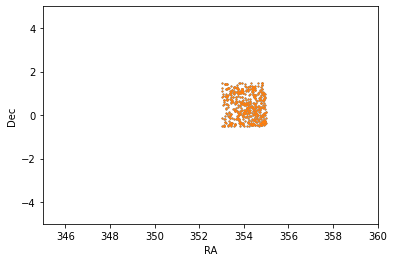

In [17]:
plt.scatter(lsbg_cat['ra'], lsbg_cat['dec'], s=1)
plt.scatter(lsbg_cat_cuts['ra'], lsbg_cat_cuts['dec'], s=1)
plt.xlabel('RA')
plt.ylabel('Dec')
plt.xlim(345, 360)
plt.ylim(-5, 5)

In [18]:
lsbg_cat = Table.read('./Catalog/random_field/lsbg_random_field2.fits') # This contains both candy+galaxy and junks

In [19]:
cat = lsbg_cat#[(lsbg_cat['good_votes'] + lsbg_cat['bad_votes']) > 2]

In [20]:
len(cat)

547

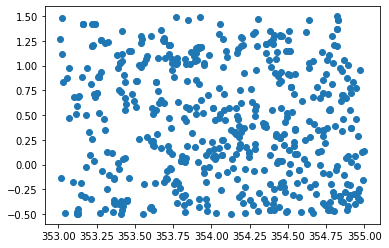

In [11]:
plt.scatter(lsbg_cat['ra'], lsbg_cat['dec'])

In [12]:
Table.read('/tigress/jiaxuanl/Data/HSC/LSBG/Catalog/random_field/random_field_cutout_cat_random_field.fits')['prefix']

/tigress/jiaxuanl/Data/HSC/LSBG/Cutout/random_field/random_field_11
/tigress/jiaxuanl/Data/HSC/LSBG/Cutout/random_field/random_field_276
/tigress/jiaxuanl/Data/HSC/LSBG/Cutout/random_field/random_field_683
/tigress/jiaxuanl/Data/HSC/LSBG/Cutout/random_field/random_field_1324
/tigress/jiaxuanl/Data/HSC/LSBG/Cutout/random_field/random_field_2111
/tigress/jiaxuanl/Data/HSC/LSBG/Cutout/random_field/random_field_3232
/tigress/jiaxuanl/Data/HSC/LSBG/Cutout/random_field/random_field_3635
/tigress/jiaxuanl/Data/HSC/LSBG/Cutout/random_field/random_field_3726
/tigress/jiaxuanl/Data/HSC/LSBG/Cutout/random_field/random_field_4032
/tigress/jiaxuanl/Data/HSC/LSBG/Cutout/random_field/random_field_4057
/tigress/jiaxuanl/Data/HSC/LSBG/Cutout/random_field/random_field_4114


In [55]:
import PIL.Image as Image

### Generate cutout

Run `'/home/jiaxuanl/Research/Packages/kuaizi/diezi/gen_cutout/nsa_sample/lsbg_cutout_nsa.sh'`

In the end, we get `$gpfs/Data/HSC/LSBG/Cutout/nsa_20hosts_cutout_cat.fits`